# Coin Changing as a Dynamic Program

In this notebook, we are going to explore the dynamic programming solution to the coin changing problem.

**Input:** A list of coin denominations <code> lst:[c1,c2,..,cj] </code> and an amount <code> x  </code> to make change for.
<p>
**Output:** Numbers <code> [n1, n2, ..., nj] </code> such that <code> n1*c1 + n2*c2 +... +nj*cj = x </code> and the number of coins <code> n1+n2+...+nj </code> is the smallest possible.

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import time

In [2]:
#Example-0
lst0 = [1,2,4,5,7] # Let us take 1cents, 2cents, 4cents, .., 7 cents
x0 = 17 # What is the best way to make change for 17 cents

## Dynamic Programming Solution

1. We are going to define a __recursive function__ $$minCoins(lst,x)$$ that will return the minimum number of coins needed to make change given $lst$ of coin denominations and $x$ the amount to make change for.

2. We will then make the recursive function efficient in two ways: (a) top-down way of memoizing the recursion using a hash table and (b) bottom up way of building and calculating entries of a memo table.

3. We will show how from $minCoins(lst,x)$, we can also figure out the optimal way to give change.

### 1. Formulating the recursive function
<p>
Let $lst: [c_1, c_2, \ldots, c_j]$ and $x> 0$ be the amount to be changed. We will first work at the base cases of the recurrence $$minCoins(lst,x)$$

__Base Case #1 __  If $x = 0$, no amount needs to be changed. 
$$minCoins(lst,0) = 0$$.

<p>
__Base Case #2 __ If $x > 0$ but $lst = []$ is the empty list, then we have change to make but no coins to make change with, or alternatively only a fictitious 0 cent coins. This is an _undesirable situation_. Therefore, we set its value to $+\infty$.
$$minCoins(lst,x) = \infty,\ \text{if}\ lst = []\ \text{and}\ x > 0 $$ 

<p>

__Recursive Definition__ Assume that none of the base cases hold. Let $lst: [c_1, c_2, \ldots, c_j]$ and $x> 0$ be the amount to be changed.

Let us focus on the last entry $c_j$ of the list. 
1. We can decide to use the coin $c_j$ or not. 
2. More generally, if $p_j = \lfloor \frac{x}{c_j} \rfloor$, then we can choose to use $c_j$ not at all (0 times), once, twice, and so on all the way up to $p_j$ times. 
3. Once we commit to using the coin $c_j$ some number of times, we are left with the sub problem involving $lst': [c_1, \ldots, c_{j-1}]$ and a modified amount $x - s_j c_j$ if coin $c_j$ ended up being used $s_j$ times.


$$minCoins([c_1,\ldots,c_j],x):\ \min\ \begin{cases} 
minCoins([c_1,\ldots,c_{j-1}],x) & \leftarrow c_j\ \text{is not used at all} \\
1 + minCoins([c_1,\ldots,c_{j-1}], x- c_j) & \leftarrow c_j\ \text{is used once}\\
\vdots & \\
p_j + minCoins([c_1,\ldots,c_{j-1}], x - p_j c_j) & \leftarrow c_j\ \text{is used}\ p_j\ \text{times}\\
\end{cases}$$


<p>
The recurrence and bases cases above are directly implemented in python


    

In [3]:
def minCoinsRec(lst,x):
    j = len(lst) # the length of the list
    # Base case
    if (x == 0):
        return 0
    elif (j == 0): # List is empty
        return 100000000 # Return a really large number as a place holder for infinity.
    # Otherwise, implement the recursive function
    
    cj = lst[j-1] # the last element
    lst1 = lst[0:j-1] # all elements of the list but the last one
    pj = int(x/cj) # How many times can coin cj be used
    minValue = 100000000 #Initialize to a very large number
    for i in range(0,pj+1): # Includes both 0 and pj
        v = i + minCoinsRec(lst1, x - i * cj) # Make a recursive call
        if (v < minValue):
            minValue = v
    return minValue # Return the final answer

# Let us try it on the lst0 example above
j = minCoinsRec(lst0,x0)
print('Minimum number of coins needed for',lst0,'-->', j)


Minimum number of coins needed for [1, 2, 4, 5, 7] --> 3


In [10]:
#Let us try it on a larger example
lst1=[1,2,4,8]
x1 = 4196

## Top-down memoization

As noted, the recursion is quite slow even for tiny inputs. Let us try a simple strategy.
Each time a recursive call returns, we add the inputs and outputs to a hash table or a dictionary.
Before we do so, we note that

1. If $lst$ is the original list of coins, all recursive calls involve
some prefix of elements $lst[0],\ldots,lst[k]$ for some $k$. 

2. The value of $x$ in every recursive call, is between $0$ and the original value of $x$ for which we are solving the problem.


The dictionary will have two arguments, $(k,x)$ that specify the list prefix length and x, the amount to make change.


In [11]:
def minCoinsMemo(lst,hTbl,x):
    j = len(lst) # the length of the list
    # Base case
    if (x == 0):
        return 0
    elif (j == 0): # List is empty
        return 100000000 # Return a really large number as a place holder for infinity.
    # Otherwise, implement the recursive function
    # MODIFICATION #1
    # Check if hTbl already has the entry (j,x)
    if ( (j,x) in hTbl):
        return hTbl[(j,x)]
    
    cj = lst[j-1] # the last element
    lst1 = lst[0:j-1] # all elements of the list but the last one
    pj = int(x/cj) # How many times can coin cj be used
    minValue = 100000000 #Initialize to a very large number
    for i in range(0,pj+1): # Includes both 0 and pj
        v = i + minCoinsMemo(lst1, hTbl,x - i * cj) # Make a recursive call
        if (v < minValue):
            minValue = v
    
    #Store the result into the hash table.
    hTbl[(j,x)] = minValue
    
    return minValue # Return the final answer



In [12]:
print('Running on list:', lst1, ' amount to change: ', x1)
j = minCoinsMemo(lst1,{},x1) # This is still slow but finishes in a few seconds
print('Minumum number of coins needed:',j)

Running on list: [1, 2, 4, 8]  amount to change:  4196
Minumum number of coins needed: 525


## Extracting The Solution

To extract the solution, we cache for each value of change $(j,x)$ encountered in the recurrence, a list that tells us how to make change for $x$ optimally using coins $[c_1,\ldots,c_j]$.


In [13]:
def minCoinsMemoAndExtractSolution(lst,hTbl,solutionTbl,x):
    j = len(lst) # the length of the list
    # Base case
    if (x == 0):
        return 0
    elif (j == 0): # List is empty
        return 100000000 # Return a really large number as a place holder for infinity.
    # Otherwise, implement the recursive function
    # MODIFICATION #1
    # Check if hTbl already has the entry (j,x)
    if ( (j,x) in hTbl):
        return hTbl[(j,x)]
    
    cj = lst[j-1] # the last element
    lst1 = lst[0:j-1] # all elements of the list but the last one
    pj = int(x/cj) # How many times can coin cj be used
    bestOption = -1
    minValue = 100000000 #Initialize to a very large number
    for i in range(0,pj+1): # Includes both 0 and pj
        v = i + minCoinsMemoAndExtractSolution(lst1, hTbl, solutionTbl, x - i * cj) # Make a recursive call
        if (v < minValue):
            minValue = v
            bestOption = i
    #Store the result into the hash table.
    hTbl[(j,x)] = minValue
    solutionTbl[(j,x)] = i
    return minValue # Return the final answer

In [14]:
# We will extract a solution using the solution table.
def extractSolution(lst,solutionTbl,x):
    j = len(lst) 
    cj = lst[-1]
    lst1 = lst[0:-1]
    if (x == 0):
        return []
    elif (j == 0):
        print('Warning: no solution')
        return None
    # Lookup the solution table for (j,x)
    assert((j,x) in solutionTbl) # It better be in the table
    i = solutionTbl[(j,x)] # Let i be the best option for using coin cj
    y = x - cj * i # Remaining amount if cj is used i times
    sol0= extractSolution(lst1,solutionTbl,y) # Recursive extract solution for the smaller list and amounts
    if (sol0 == None): # If no solution for lst1, y pass that on
        return None # 
    sol0.append((cj,i)) # Otherwise, take that solution and add (cj,i) to it
    return sol0 # return
        

In [15]:
solutionTbl={}
lst1
x1
mValue = minCoinsMemoAndExtractSolution(lst1,{},solutionTbl,x1)
sol = extractSolution(lst1,solutionTbl,x1)
if (sol == None):
    print('No solution')
else:
    r = [print('Coin:',c,' number:',i) for (c,i) in sol]

Coin: 4  number: 1
Coin: 8  number: 524


## Bottomup Memoization

Top-down memoization just augments the recursion with a hash table. We can go bottom-up. Where we just construct a table of all possible recursive calls and fill it in. 

If we go back to the minCoins recurrence, let $lst: [c_1,\ldots,c_n]$ be the original list and $x$ be the original amount.

1. Every subsequent call is of the form $\overline{lst}: [c_1,\ldots, c_j]$ for some $j \geq 0$ and some amount $0 \leq y < x$.

Let us make a 2D memo table where the rows are the amounts from $0, 1, 2, \ldots, x$ and the columns are values of $j$ from $j=0, 1, 2,\ldots, n$ denoting the lists $[c_1,\ldots,c_j]$. For $j=0$, we get the empty list.

$$\begin{array}{|c|c|c|c|c|c|}
\hline
   & [] & [c_1] & [c_1, c_2] & \cdots & [c_1, c_2, \ldots, c_{n-1}] & [c_1, \ldots, c_n] \\
   \hline
 0 & 0 & 0 & 0 &  \cdots &  0&  0\\
 1 & \infty & & & & & \\
 2 & \infty & & & & & \\
 \vdots & & & & \ddots & & \\
 x & \infty & & \cdots & & &  ?? \\
 \hline
\end{array}$$

The memo table has size $n \times x$ and we fill the table in starting from top left corner to the bottom right corner. The moment the bottom right corner is filled in, we have solved the original problem!


In [16]:
def minCoinsBottomUpMemoTable(lst,x):
    n = len(lst)
    # Create a memo table with (x+1) rows and (n+1) columns
    memoTbl =  [ [0 for i in range(0,n+1) ] for j in range(0,x+1) ]
    solutionTbl = [[ -1 for i in range(0,n+1)] for j in range(0,x+1)]
    # No need to fill in the 0s in the table
    for y in range(1,x+1):
        memoTbl[y][0] = 1000000
        for j in range(1,n+1):
            cj = lst[j-1]
            if (y < cj):
                memoTbl[y][j] = memoTbl[y][j-1]
                solutionTbl[y][j] = 0
            else:
                pj = int(y/cj)
                assert(pj > 0)
                minValue= 1000000
                bestOption = -1
                for i in range(0,pj+1):
                    l = i+memoTbl[y-i*cj][j-1]
                    if (l < minValue):
                        minValue = l
                        bestOption = i
                #Update memo table and solution tables
                memoTbl[y][j] = minValue
                solutionTbl[y][j] = bestOption
    # Done
    print('Minimum number of coins needed:', memoTbl[x][n])
    # Extracting solution
    j = n
    y = x
    while (y > 0 and j >= 0):
        k = solutionTbl[y][j]
        print('Coin:', lst[j-1], ' # Times:', k)
        y = y - k * lst[j-1]
        j = j -1
    
    

    

In [17]:
lst1
x1
minCoinsBottomUpMemoTable(lst1,x1)

Minimum number of coins needed: 525
Coin: 8  # Times: 524
Coin: 4  # Times: 1


In [18]:
def measureRunningTimeComplexity(fun,lst,x):
    t0 = time.clock()
    fun(lst,x)
    t1 = time.clock() # A rather crude way to time the process.
    return (t1 - t0)

[1] 9
Minimum number of coins needed: 9
Coin: 1  # Times: 9
[1, 2] 15
Minimum number of coins needed: 8
Coin: 2  # Times: 7
Coin: 1  # Times: 1
[1, 2, 4] 27
Minimum number of coins needed: 8
Coin: 4  # Times: 6
Coin: 2  # Times: 1
Coin: 1  # Times: 1
[1, 2, 4, 8] 51
Minimum number of coins needed: 8
Coin: 8  # Times: 6
Coin: 4  # Times: 0
Coin: 2  # Times: 1
Coin: 1  # Times: 1
[1, 2, 4, 8, 16] 99
Minimum number of coins needed: 8
Coin: 16  # Times: 6
Coin: 8  # Times: 0
Coin: 4  # Times: 0
Coin: 2  # Times: 1
Coin: 1  # Times: 1
[1, 2, 4, 8, 16, 32] 195
Minimum number of coins needed: 8
Coin: 32  # Times: 6
Coin: 16  # Times: 0
Coin: 8  # Times: 0
Coin: 4  # Times: 0
Coin: 2  # Times: 1
Coin: 1  # Times: 1
[1, 2, 4, 8, 16, 32, 64] 387
Minimum number of coins needed: 8
Coin: 64  # Times: 6
Coin: 32  # Times: 0
Coin: 16  # Times: 0
Coin: 8  # Times: 0
Coin: 4  # Times: 0
Coin: 2  # Times: 1
Coin: 1  # Times: 1


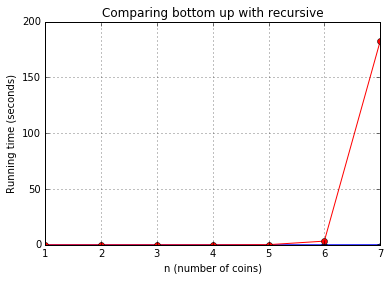

In [20]:
# Let us generate a plot of the running times
nList=[]
bottomUpTimes=[]
topDownTimes=[]
for i in range(1,8):
    lst=[2**j for j in range(0,i) ]
    x = 2**(i+1)+ 2**i+3
    print(lst,x)
    t1 = measureRunningTimeComplexity(minCoinsBottomUpMemoTable,lst,x)
    t2 = measureRunningTimeComplexity(minCoinsRec,lst,x)
    nList.append(i)
    bottomUpTimes.append(t1)
    topDownTimes.append(t2)


plt1=plt.plot(nList,bottomUpTimes,'-b*')
plt2=plt.plot(nList,topDownTimes,'-ro')
plt.xlabel('n (number of coins)')
plt.ylabel('Running time (seconds)')
plt.title('Comparing bottom up with recursive')
##plt.legend([plt1,plt2],['Bottom Up','Recursive'])
plt.grid(True)